In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import os
import json
from pathlib import Path

In [2]:
def func(object_name):
    if "." in object_name:
        return False
    else:
        return True

In [3]:
folder_path = "./jsons/baseline/simple_7/"
algos = filter(func, sorted(os.listdir(folder_path)))
algos = list(algos)

### Global Accuracy

In [4]:
data = {algo: [] for algo in algos}
for algo in algos:
    global_cfmtx = json.load(open(os.path.join(folder_path, algo, "global_cfmtx_record.json"), "r"))
    for r in range(len(global_cfmtx)):
        data[algo].append(np.mean(np.diag(global_cfmtx[r])))

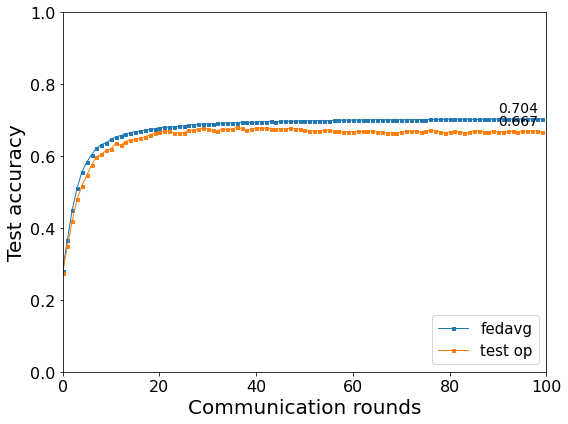

In [6]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(8,6))
plt.xlabel("Communication rounds", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)

for algo in data.keys():
    plt.plot(data[algo], label=algo.replace("_", " "),
            linestyle='solid', marker='s',
            linewidth=1, markersize=3)
    plt.text(x=90, y=data[algo][-1]+0.02, s=f"{data[algo][-1]:>.3f}", fontdict={"fontsize":14})
    
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend(loc="lower right", fontsize=15, ncol=1)
plt.tight_layout()
plt.savefig(folder_path + "Global_Accuracy.png")

<Figure size 576x432 with 0 Axes>

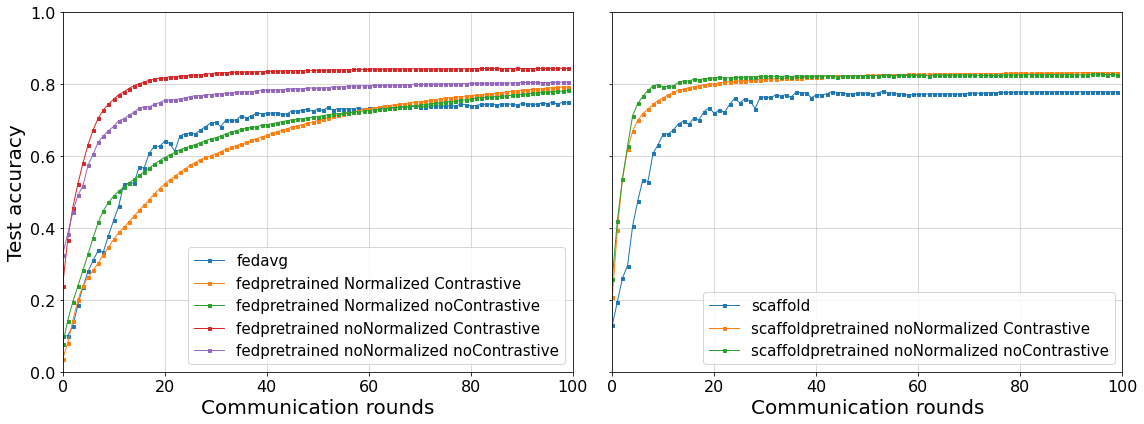

In [13]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(8,6))
fig, axes = plt.subplots(1,2, figsize=(16, 6), sharey=True)
axes[0].set_xlabel("Communication rounds", fontsize=20)
axes[1].set_xlabel("Communication rounds", fontsize=20)

axes[0].set_ylabel("Test accuracy", fontsize=20)

for algo in data.keys():
    if "scaffold" not in algo:
        axes[0].plot(data[algo], label=algo.replace("_", " "),
                linestyle='solid', marker='s',
                linewidth=1, markersize=3)
    else:
        axes[1].plot(data[algo], label=algo.replace("_", " "),
                linestyle='solid', marker='s',
                linewidth=1, markersize=3)

axes[0].legend(loc="lower right", fontsize=15, ncol=1)
axes[0].grid(alpha=0.6)
axes[1].legend(loc="lower right", fontsize=15, ncol=1)
axes[1].grid(alpha=0.6)

axes[0].set_ylim(0,1)
axes[0].set_xlim(0,100)
axes[1].set_xlim(0,100)

plt.tight_layout()
plt.savefig(folder_path + "Global_Accuracy.png")

### Local Accuracy

### Contrastive infor analysis

In [1]:
folder_path = "./jsons/baseline/simple_7/fedavgv2_contrastive_1"

global_data = json.load(open(f"{folder_path}/global_constrastive_info.json", "r"))
local_data = json.load(open(f"{folder_path}/local_constrastive_info.json", "r"))

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)

axes[0].set_xlabel("Communication rounds", fontsize=20)
axes[0].set_ylabel("Global similarity", fontsize=20)

axes[0].plot(global_data["same"], label="Samples of the same class", linestyle='solid', marker='s', linewidth=1, markersize=3, color="red")
axes[0].plot(global_data["diff"], label="Samples of different classes", linestyle='solid', marker='o', linewidth=1, markersize=3, color="blue")

axes[0].set_xlim(0,100)
axes[0].set_ylim(0,1)
axes[0].legend(loc="lower right", fontsize=15, ncol=1)

cols = ["blue", "red", "green", "orange", "purple"]
axes[1].set_xlabel("Communication rounds", fontsize=20)
axes[1].set_ylabel("Local similarity", fontsize=20)

for i in range(2):
    axes[1].plot(local_data[str(i)]["same"], label=f"client {i} SCS", linestyle='solid', marker='s', linewidth=1, markersize=3, color=cols[i])

for i in range(2):
    axes[1].plot(local_data[str(i)]["diff"], label=f"client {i} DCS", linestyle='dashed', marker='o', linewidth=1, markersize=3, color=cols[i])

axes[1].set_xlim(0,100)
axes[1].set_ylim(0,1)
axes[1].legend(loc="best", fontsize=15, ncol=2)

plt.tight_layout()
plt.savefig(folder_path + "/Contrastive_infor.png")
# plt.show()

NameError: name 'json' is not defined

### Class to class contrastive

Text(0.5, 1.0, 'Round 20')

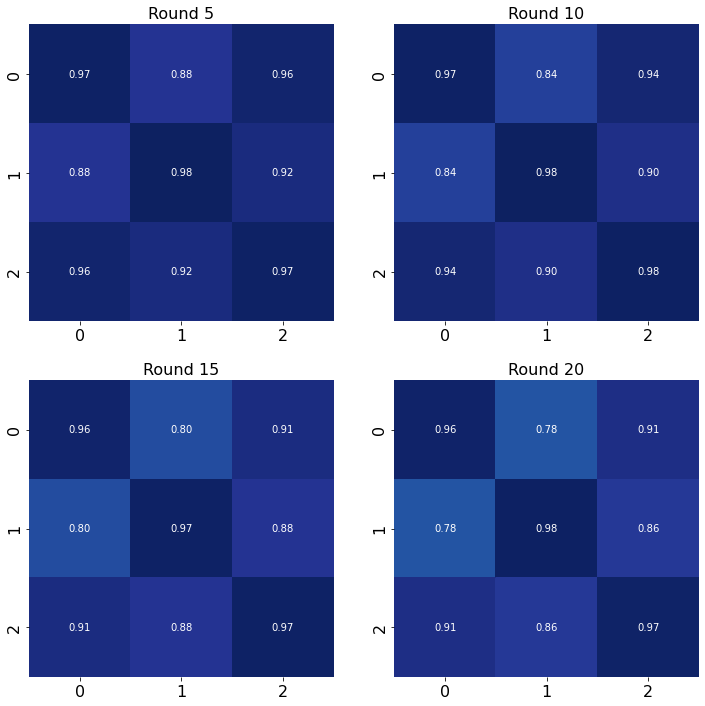

In [8]:
import seaborn as sns

folder_path = "./jsons/baseline/simple_5/"
# folder_path += "fedavg"
folder_path += "scaffold"
# folder_path += "fedavgv2_contrastive_1"

global_data = json.load(open(f"{folder_path}/global_constrastive_info.json", "r"))

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

r = 5
sns.heatmap(ax=axes[0,0], data=global_data["sim_mtx"][r], annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, vmin=0, vmax=1)
axes[0,0].set_title(f"Round {r}", fontsize=16)

r = 10
sns.heatmap(ax=axes[0,1], data=global_data["sim_mtx"][r], annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, vmin=0, vmax=1)
axes[0,1].set_title(f"Round {r}", fontsize=16)

r = 15
sns.heatmap(ax=axes[1,0], data=global_data["sim_mtx"][r], annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, vmin=0, vmax=1)
axes[1,0].set_title(f"Round {r}", fontsize=16)

r = 20
sns.heatmap(ax=axes[1,1], data=global_data["sim_mtx"][r], annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, vmin=0, vmax=1)
axes[1,1].set_title(f"Round {r}", fontsize=16)

